In [1]:
#分析に必要なライブラリ、モジュールをimport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as display
sns.set()
import urllib.request
from io import StringIO
#回帰分析で使うライブラリ
import scipy.stats as stats
import statsmodels.formula.api as smf
#scikit-Learnで使うもの
from sklearn.impute import SimpleImputer #欠損値の補間
from sklearn.model_selection import train_test_split #データの分割
from sklearn.preprocessing import MinMaxScaler #正規化
from sklearn.preprocessing import StandardScaler #標準化
from sklearn.linear_model import LinearRegression #重回帰モデル
from sklearn.linear_model import Ridge #　Ridge回帰
from sklearn.linear_model import Lasso #Lasso回帰
from sklearn.preprocessing import PolynomialFeatures #高次項の生成
from sklearn.metrics import r2_score #決定係数の計算
from sklearn.metrics import mean_squared_error #MSEの計算
from sklearn.metrics import mean_absolute_error #MAEの計算

In [3]:
%pip install xgboost

import xgboost as xgb

Note: you may need to restart the kernel to use updated packages.


In [2]:
#WEB上のcsvデータを読み込んでデータフレームとする。
import pandas as pd
#データを読み込む関数を定義
def read_csv(file_name):
    print(file_name)
    df = pd.read_csv(file_name)
    return df

def read_csv_sub(file2):
    print(file2)
    df = pd.read_csv(file2,header=None)
    return df

#WEB上のデータのURLを指定
file_train = "smbc/train.csv"
file_test = "smbc/test.csv"
file_sample_submition = "smbc/sample_submission.csv"
#データを読み込む
df_train = read_csv(file_train)
df_test = read_csv(file_test)
df_sample_submission = read_csv_sub(file_sample_submition)

#データの概要を確認
display.display(df_train.head())
display.display(df_test.head())
display.display(df_sample_submission.head())



smbc/train.csv
smbc/test.csv
smbc/sample_submission.csv


,Unnamed: 0,created_at,tree_dbh,curb_loc,health,steward,guards,sidewalk,user_type,problems,...,nta,nta_name,borocode,boro_ct,boroname,zip_city,cb_num,st_senate,st_assem,cncldist
0,0,2015-06-29,14,OnCurb,1,NaN,NaN,Damage,Volunteer,NaN,...,QN45,Douglas Manor-Douglaston-Little Neck,4,4152901,Queens,Little Neck,411,11,25,23
1,1,2016-09-21,5,OnCurb,1,3or4,Helpful,NoDamage,Volunteer,NaN,...,BX05,Bedford Park-Fordham North,2,2039901,Bronx,Bronx,207,33,78,15
2,2,2015-09-13,26,OnCurb,2,NaN,NaN,NoDamage,Volunteer,StonesBranchLights,...,SI01,Annadale-Huguenot-Prince's Bay-Eltingville,5,5017011,Staten Island,Staten Island,503,24,62,51
3,3,2016-05-09,15,OnCurb,0,NaN,NaN,Damage,NYC Parks Staff,NaN,...,SI11,Charleston-Richmond Valley-Tottenville,5,5024401,Staten Island,Staten Island,503,24,62,51
4,4,2016-06-24,23,OnCurb,1,NaN,NaN,NoDamage,Volunteer,Stones,...,MN03,Central Harlem North-Polo Grounds,1,1022102,Manhattan,New York,110,30,70,9


,Unnamed: 0,created_at,tree_dbh,curb_loc,steward,guards,sidewalk,user_type,problems,spc_common,...,nta,nta_name,borocode,boro_ct,boroname,zip_city,cb_num,st_senate,st_assem,cncldist
0,19984,2015-09-08,15,OnCurb,NaN,NaN,Damage,NYC Parks Staff,NaN,Callery pear,...,BK17,Sheepshead Bay-Gerritsen Beach-Manhattan Beach,3,3062000,Brooklyn,Brooklyn,315,22,45,48
1,19985,2015-10-15,5,OnCurb,1or2,NaN,NoDamage,Volunteer,NaN,cherry,...,BX62,Woodlawn-Wakefield,2,2045101,Bronx,Bronx,212,34,81,11
2,19986,2016-08-03,4,OnCurb,NaN,Unsure,NoDamage,Volunteer,NaN,littleleaf linden,...,QN60,Kew Gardens,4,4013800,Queens,Kew Gardens,409,14,27,29
3,19987,2015-08-06,7,OnCurb,NaN,NaN,NoDamage,TreesCount Staff,NaN,dawn redwood,...,BK09,Brooklyn Heights-Cobble Hill,3,3000301,Brooklyn,Brooklyn,302,26,52,33
4,19988,2015-10-21,6,OnCurb,1or2,Helpful,NoDamage,TreesCount Staff,Stones,purple-leaf plum,...,BK75,Bedford,3,3025100,Brooklyn,Brooklyn,303,25,56,36


,0,1
0,19984,1
1,19985,2
2,19986,0
3,19987,1
4,19988,2


In [5]:
#df_trainのデータの概要を確認
display.display(df_train.describe())

#df_testのデータの概要を確認
display.display(df_test.describe())

,Unnamed: 0,tree_dbh,health,borocode,boro_ct,cb_num,st_senate,st_assem,cncldist
count,19984.000000,19984.000000,19984.000000,19984.000000,1.998400e+04,19984.000000,19984.000000,19984.000000,19984.000000
mean,9991.500000,11.694906,0.858036,3.360088,3.405346e+06,343.159077,21.111189,51.913981,30.346327
std,5769.028226,8.198150,0.437807,1.232246,1.239741e+06,122.264942,7.188537,18.642931,14.824068
min,0.000000,1.000000,0.000000,1.000000,1.000202e+06,101.000000,10.000000,23.000000,1.000000
25%,4995.750000,5.000000,1.000000,3.000000,3.005900e+06,301.000000,15.000000,33.000000,19.000000
50%,9991.500000,9.000000,1.000000,4.000000,4.009200e+06,402.000000,22.000000,56.000000,31.000000
75%,14987.250000,17.000000,1.000000,4.000000,4.122300e+06,413.000000,25.000000,64.000000,44.000000
max,19983.000000,42.000000,2.000000,5.000000,5.031902e+06,503.000000,36.000000,87.000000,51.000000


,Unnamed: 0,tree_dbh,borocode,boro_ct,cb_num,st_senate,st_assem,cncldist
count,19702.000000,19702.000000,19702.000000,1.970200e+04,19702.000000,19702.000000,19702.000000,19702.000000
mean,29982.877677,11.600041,3.360319,3.406002e+06,343.219775,20.992945,51.572581,30.215714
std,5767.184780,8.206049,1.223202,1.231092e+06,121.434253,7.208765,18.671359,14.721721
min,19984.000000,1.000000,1.000000,1.000202e+06,101.000000,10.000000,23.000000,1.000000
25%,24983.250000,5.000000,3.000000,3.006200e+06,302.000000,15.000000,32.000000,19.000000
50%,29980.500000,8.000000,4.000000,4.012301e+06,402.000000,22.000000,55.000000,31.000000
75%,34982.750000,17.000000,4.000000,4.115100e+06,413.000000,25.000000,64.000000,44.000000
max,39968.000000,44.000000,5.000000,5.031902e+06,503.000000,36.000000,87.000000,51.000000


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'tree_dbh'}>,
        <Axes: title={'center': 'health'}>],
       [<Axes: title={'center': 'borocode'}>,
        <Axes: title={'center': 'boro_ct'}>,
        <Axes: title={'center': 'cb_num'}>],
       [<Axes: title={'center': 'st_senate'}>,
        <Axes: title={'center': 'st_assem'}>,
        <Axes: title={'center': 'cncldist'}>]], dtype=object)

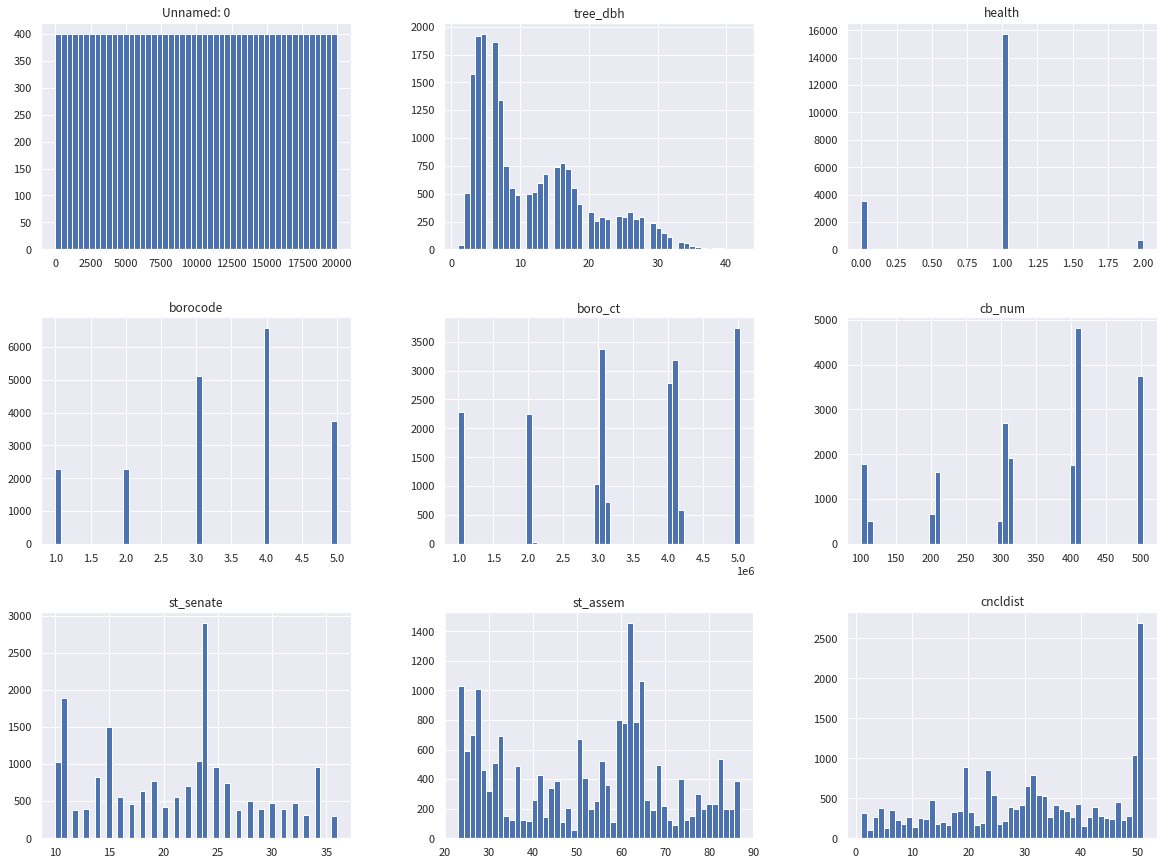

In [6]:
#df_trainのヒストグラムを確認
df_train.hist(bins=50, figsize=(20,15))

In [7]:
#problemsのカラムを確認
df_train["problems"].value_counts()


Stones                                 2219
BranchLights                           1036
StonesBranchLights                      762
BranchOther                             408
RootOther                               333
                                       ... 
RootOtherWiresRopeTrunkLights             8
StonesRootOtherWiresRopeBranchOther       5
TrunkLightsBranchLightsBranchOther        4
StonesMetalGratesTrunkOther               4
WiresRopeTrunkLightsBranchLights          4
Name: problems, Length: 73, dtype: int64

In [8]:
import pandas as pd
import re

# df_trainは、既存のデータフレームと仮定します
# "problems"カラムには、"StonesRootOtherTrunkOtherBranchOther"のような文字列が格納されていると仮定します

# 大文字で始まる単語に分割する関数を定義
def split_into_words(s):
    return re.findall(r'[A-Z][a-z]*', str(s))

# "problems"カラムの各値を単語に分割
df_train['problems'] = df_train['problems'].apply(split_into_words)

# 単語ごとに新たな特徴量を作成して追加
for word in ['Stones', 'Root', 'Trunk', 'Branch', 'Other']:
    df_train['problem_' + word] = df_train['problems'].apply(lambda x: 1 if word in x else 0)

# "problems"カラムはもう不要なので削除
df_train.drop('problems', axis=1, inplace=True)

print(df_train)

       Unnamed: 0  created_at  tree_dbh curb_loc  health steward   guards  \
0               0  2015-06-29        14   OnCurb       1     NaN      NaN   
1               1  2016-09-21         5   OnCurb       1    3or4  Helpful   
2               2  2015-09-13        26   OnCurb       2     NaN      NaN   
3               3  2016-05-09        15   OnCurb       0     NaN      NaN   
4               4  2016-06-24        23   OnCurb       1     NaN      NaN   
...           ...         ...       ...      ...     ...     ...      ...   
19979       19979  2016-07-15        19   OnCurb       2     NaN      NaN   
19980       19980  2016-07-08         5   OnCurb       1     NaN      NaN   
19981       19981  2015-08-20        21   OnCurb       0     NaN      NaN   
19982       19982  2016-06-20         4   OnCurb       1    1or2      NaN   
19983       19983  2015-08-19        31   OnCurb       1     NaN      NaN   

       sidewalk        user_type          spc_common  ...       zip_city  \

In [9]:
# df_testは、既存のデータフレームと仮定します
# "problems"カラムには、"StonesRootOtherTrunkOtherBranchOther"のような文字列が格納されていると仮定します

# 大文字で始まる単語に分割する関数を定義
def split_into_words(s):
    return re.findall(r'[A-Z][a-z]*', str(s))

# "problems"カラムの各値を単語に分割
df_test['problems'] = df_test['problems'].apply(split_into_words)

# 単語ごとに新たな特徴量を作成して追加
for word in ['Stones', 'Root', 'Trunk', 'Branch', 'Other']:
    df_test['problem_' + word] = df_test['problems'].apply(lambda x: 1 if word in x else 0)

# "problems"カラムはもう不要なので削除
df_test.drop('problems', axis=1, inplace=True)

print(df_test)

       Unnamed: 0  created_at  tree_dbh curb_loc steward   guards  sidewalk  \
0           19984  2015-09-08        15   OnCurb     NaN      NaN    Damage   
1           19985  2015-10-15         5   OnCurb    1or2      NaN  NoDamage   
2           19986  2016-08-03         4   OnCurb     NaN   Unsure  NoDamage   
3           19987  2015-08-06         7   OnCurb     NaN      NaN  NoDamage   
4           19988  2015-10-21         6   OnCurb    1or2  Helpful  NoDamage   
...           ...         ...       ...      ...     ...      ...       ...   
19697       39964  2015-09-10         3   OnCurb    1or2  Harmful    Damage   
19698       39965  2016-09-09         9   OnCurb    1or2      NaN  NoDamage   
19699       39966  2015-12-31        16   OnCurb     NaN      NaN    Damage   
19700       39967  2016-09-07        24   OnCurb     NaN      NaN    Damage   
19701       39968  2016-09-12        25   OnCurb     NaN      NaN  NoDamage   

              user_type         spc_common         

In [10]:
#created_atのカラムを年、月、日に分割
df_train['year'] = pd.to_datetime(df_train['created_at']).dt.year
df_train['month'] = pd.to_datetime(df_train['created_at']).dt.month
df_train['day'] = pd.to_datetime(df_train['created_at']).dt.day

#created_atのカラムを年、月、日に分割
df_test['year'] = pd.to_datetime(df_test['created_at']).dt.year
df_test['month'] = pd.to_datetime(df_test['created_at']).dt.month
df_test['day'] = pd.to_datetime(df_test['created_at']).dt.day

#データを確認
display.display(df_train.head())
display.display(df_test.head())


,Unnamed: 0,created_at,tree_dbh,curb_loc,health,steward,guards,sidewalk,user_type,spc_common,...,st_assem,cncldist,problem_Stones,problem_Root,problem_Trunk,problem_Branch,problem_Other,year,month,day
0,0,2015-06-29,14,OnCurb,1,NaN,NaN,Damage,Volunteer,English oak,...,25,23,0,0,0,0,0,2015,6,29
1,1,2016-09-21,5,OnCurb,1,3or4,Helpful,NoDamage,Volunteer,crimson king maple,...,78,15,0,0,0,0,0,2016,9,21
2,2,2015-09-13,26,OnCurb,2,NaN,NaN,NoDamage,Volunteer,English oak,...,62,51,1,0,0,1,0,2015,9,13
3,3,2016-05-09,15,OnCurb,0,NaN,NaN,Damage,NYC Parks Staff,honeylocust,...,62,51,0,0,0,0,0,2016,5,9
4,4,2016-06-24,23,OnCurb,1,NaN,NaN,NoDamage,Volunteer,London planetree,...,70,9,1,0,0,0,0,2016,6,24


,Unnamed: 0,created_at,tree_dbh,curb_loc,steward,guards,sidewalk,user_type,spc_common,spc_latin,...,st_assem,cncldist,problem_Stones,problem_Root,problem_Trunk,problem_Branch,problem_Other,year,month,day
0,19984,2015-09-08,15,OnCurb,NaN,NaN,Damage,NYC Parks Staff,Callery pear,Pyrus calleryana,...,45,48,0,0,0,0,0,2015,9,8
1,19985,2015-10-15,5,OnCurb,1or2,NaN,NoDamage,Volunteer,cherry,Prunus,...,81,11,0,0,0,0,0,2015,10,15
2,19986,2016-08-03,4,OnCurb,NaN,Unsure,NoDamage,Volunteer,littleleaf linden,Tilia cordata,...,27,29,0,0,0,0,0,2016,8,3
3,19987,2015-08-06,7,OnCurb,NaN,NaN,NoDamage,TreesCount Staff,dawn redwood,Metasequoia glyptostroboides,...,52,33,0,0,0,0,0,2015,8,6
4,19988,2015-10-21,6,OnCurb,1or2,Helpful,NoDamage,TreesCount Staff,purple-leaf plum,Prunus cerasifera,...,56,36,1,0,0,0,0,2015,10,21


In [11]:
#zip_cityのカラムを確認
display.display(df_train["zip_city"].head())

0      Little Neck
1            Bronx
2    Staten Island
3    Staten Island
4         New York
Name: zip_city, dtype: object

In [12]:
# 'zip_city'と'boroname'の組み合わせを作成
df_train['combined_address'] = df_train['zip_city'] + ', ' + df_train['boroname']

# ユニークな組み合わせを抽出
unique_addresses = df_train[['zip_city', 'boroname']].drop_duplicates()
unique_addresses['combined_address'] = unique_addresses['zip_city'] + ', ' + unique_addresses['boroname']

In [13]:
%pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [14]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import tqdm

# ジオコーディングの実行
geolocator = Nominatim(user_agent="geoapiExercises")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

unique_addresses['location'] = unique_addresses['combined_address'].apply(lambda addr: geocode(addr))
unique_addresses['latitude'] = unique_addresses['location'].apply(lambda loc: loc.latitude if loc else None)
unique_addresses['longitude'] = unique_addresses['location'].apply(lambda loc: loc.longitude if loc else None)

# 元のデータフレームにジオコーディング結果をマージ
df_train = pd.merge(df_train, unique_addresses[['combined_address', 'latitude', 'longitude']], on='combined_address', how='left')

#df_trainのデータを確認
display.display(df_train.head())

,Unnamed: 0,created_at,tree_dbh,curb_loc,health,steward,guards,sidewalk,user_type,spc_common,...,problem_Root,problem_Trunk,problem_Branch,problem_Other,year,month,day,combined_address,latitude,longitude
0,0,2015-06-29,14,OnCurb,1,NaN,NaN,Damage,Volunteer,English oak,...,0,0,0,0,2015,6,29,"Little Neck, Queens",40.774534,-73.741256
1,1,2016-09-21,5,OnCurb,1,3or4,Helpful,NoDamage,Volunteer,crimson king maple,...,0,0,0,0,2016,9,21,"Bronx, Bronx",40.850656,-73.866524
2,2,2015-09-13,26,OnCurb,2,NaN,NaN,NoDamage,Volunteer,English oak,...,0,0,1,0,2015,9,13,"Staten Island, Staten Island",40.583456,-74.149605
3,3,2016-05-09,15,OnCurb,0,NaN,NaN,Damage,NYC Parks Staff,honeylocust,...,0,0,0,0,2016,5,9,"Staten Island, Staten Island",40.583456,-74.149605
4,4,2016-06-24,23,OnCurb,1,NaN,NaN,NoDamage,Volunteer,London planetree,...,0,0,0,0,2016,6,24,"New York, Manhattan",40.789624,-73.959894


In [15]:
#year,nmonth,day,latitude,longitudeから天気を取得する関数を定義

import requests
import json
import datetime
import time

def get_weather(year,month,day,latitude,longitude):
    #日付を作成
    date = datetime.date(year,month,day)
    #UNIX時間に変換
    unixtime = time.mktime(date.timetuple())
    #緯度、経度を文字列に変換
    latitude = str(int(latitude))
    longitude = str(int(longitude))
    #APIのURLを作成
    url = "https://api.darksky.net/forecast/1f7d3a8b1c4c4d1a4b3f5d3b6d7b0b9f/" + latitude + "," + longitude + "," + str(int(unixtime))
    #APIにリクエストを送信
    response = requests.get(url)
    #結果をJSON形式で取得
    data = json.loads(response.text)
    #天気を取得
    weather = data["currently"]["summary"]
    #天気を返す
    return weather

#df_trainに天気のカラムを追加
df_train['weather'] = df_train.apply(lambda x: get_weather(x['year'], x['month'], x['day'], x['latitude'], x['longitude']), axis=1)

#df_trainのデータを確認
display.display(df_train.head())

JSONDecodeError: Unexpected UTF-8 BOM (decode using utf-8-sig): line 1 column 1 (char 0)

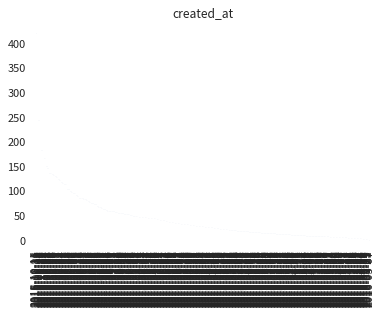

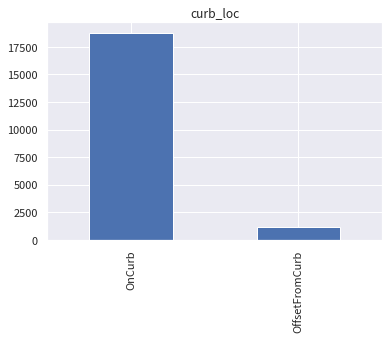

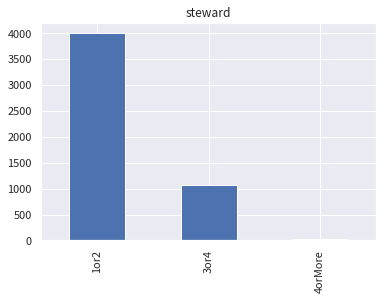

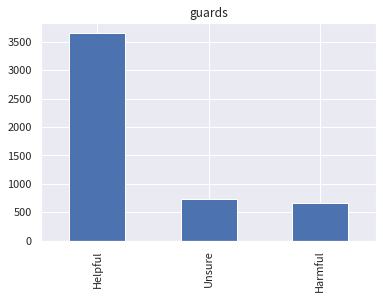

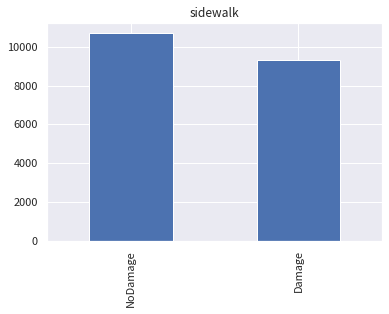

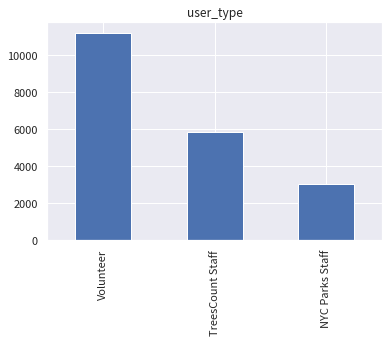

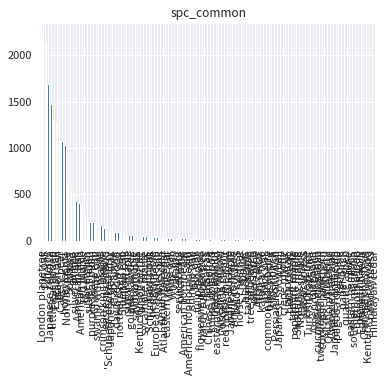

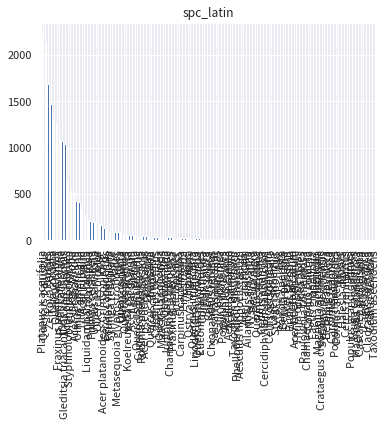

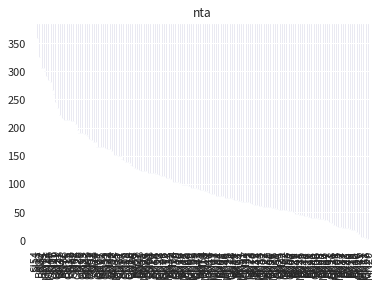

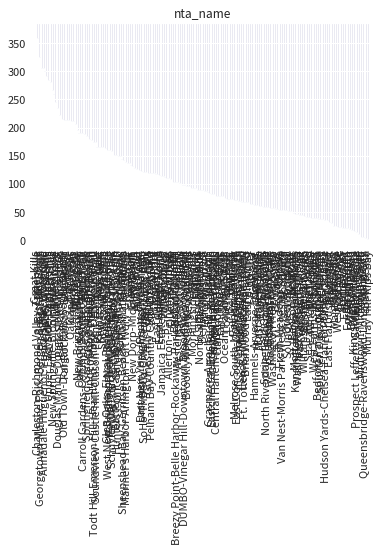

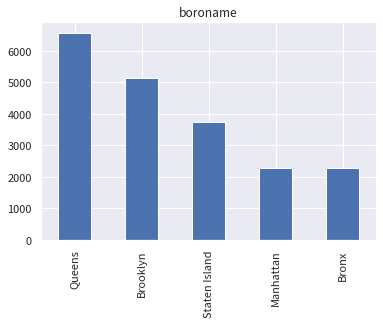

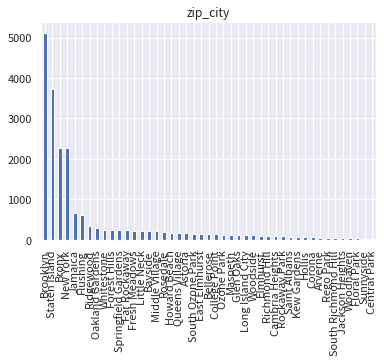

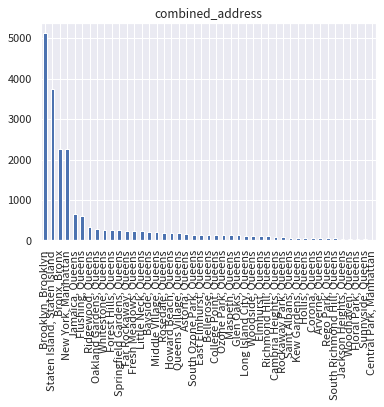

In [16]:
#df_trainのobject型のデータをカテゴリー型に変換
for col in df_train.columns:
    if df_train[col].dtype == 'object':
        df_train[col] = df_train[col].astype('category')


#カテゴリー型を含む列をカテゴリごとに分けて、それぞれのヒストグラムを確認
for col in df_train.columns:
    if df_train[col].dtype.name == 'category':
        df_train[col].value_counts().plot.bar()
        plt.title(col)
        plt.show()


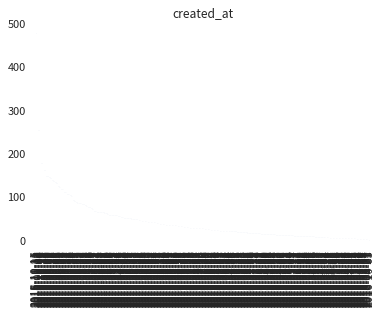

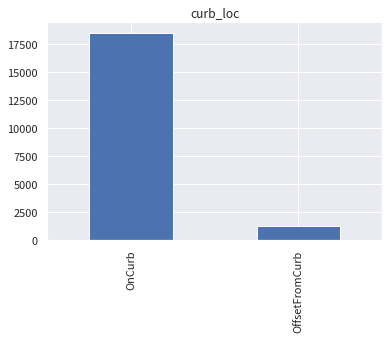

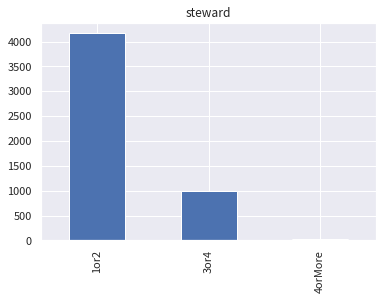

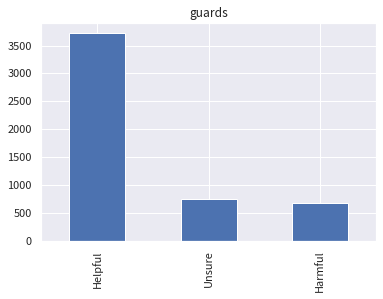

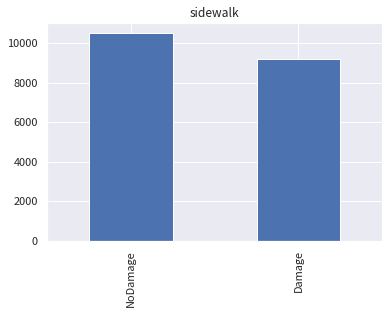

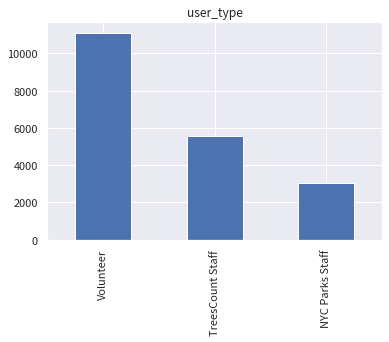

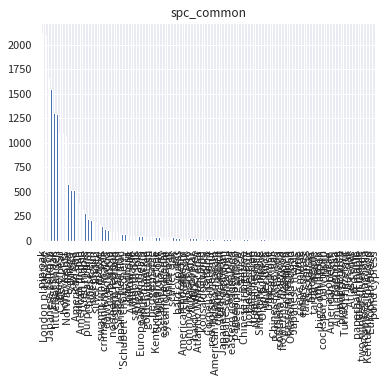

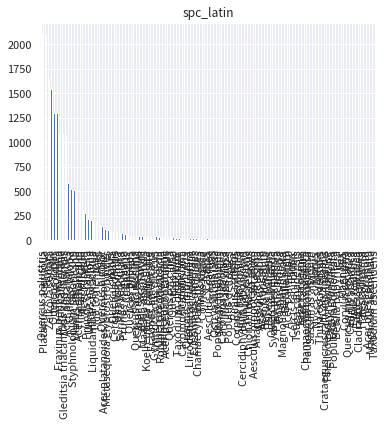

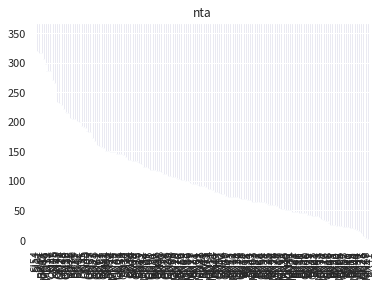

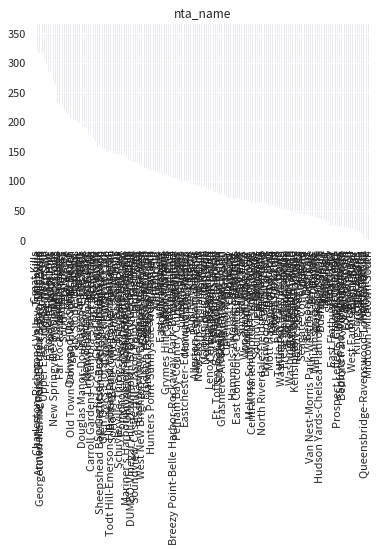

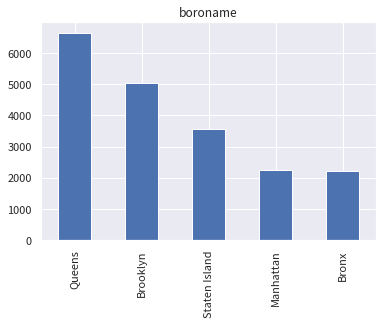

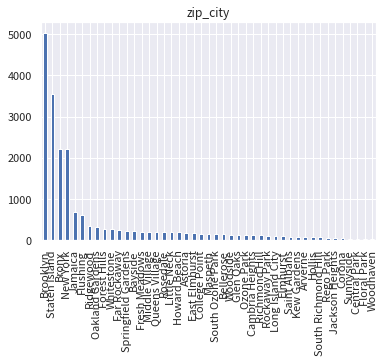

In [17]:
#df_testのobject型のデータをカテゴリー型に変換
for col in df_test.columns:
    if df_test[col].dtype == 'object':
        df_test[col] = df_test[col].astype('category')

for col in df_test.columns:
    if df_test[col].dtype.name == 'category':
        df_test[col].value_counts().plot.bar()
        plt.title(col)
        plt.show()


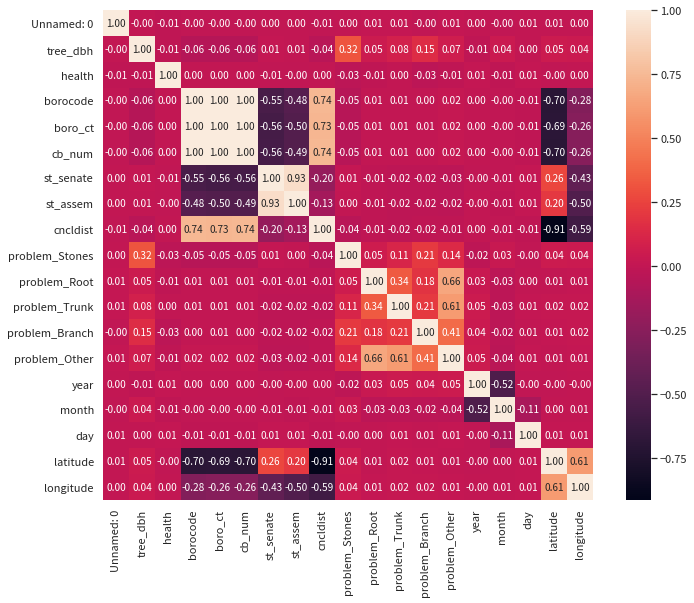

In [18]:
#heathと各変数との関係をヒートマップで確認
plt.figure(figsize=(12, 9))
sns.heatmap(df_train.corr(), annot=True, square=True, fmt='.2f')
plt.show()

In [19]:

# Calculate the correlation between each feature and 'health'
correlation = df_train.corr()['health']

# Select the feature with the highest correlation
highest_correlation_feature = correlation.drop('health').idxmax()

# Create a new feature based on the selected feature
df_train['new_feature'] = df_train[highest_correlation_feature]
print(df_train['new_feature'].head())

# Create a new feature based on the selected feature
df_test['new_feature'] = df_test[highest_correlation_feature]
print(df_test['new_feature'].head())

0    2015
1    2016
2    2015
3    2016
4    2016
Name: new_feature, dtype: int64
0    2015
1    2015
2    2016
3    2015
4    2015
Name: new_feature, dtype: int64


In [20]:
#df_trainのデータの欠損値を確認
df_train.isnull().sum()

Unnamed: 0              0
created_at              0
tree_dbh                0
curb_loc                0
health                  0
steward             14883
guards              14943
sidewalk                0
user_type               0
spc_common              0
spc_latin               0
nta                     0
nta_name                0
borocode                0
boro_ct                 0
boroname                0
zip_city                0
cb_num                  0
st_senate               0
st_assem                0
cncldist                0
problem_Stones          0
problem_Root            0
problem_Trunk           0
problem_Branch          0
problem_Other           0
year                    0
month                   0
day                     0
combined_address        0
latitude                0
longitude               0
new_feature             0
dtype: int64

In [21]:
#データ型を確認
display.display(df_train.dtypes)
display.display(df_test.dtypes)

Unnamed: 0             int64
created_at          category
tree_dbh               int64
curb_loc            category
health                 int64
steward             category
guards              category
sidewalk            category
user_type           category
spc_common          category
spc_latin           category
nta                 category
nta_name            category
borocode               int64
boro_ct                int64
boroname            category
zip_city            category
cb_num                 int64
st_senate              int64
st_assem               int64
cncldist               int64
problem_Stones         int64
problem_Root           int64
problem_Trunk          int64
problem_Branch         int64
problem_Other          int64
year                   int64
month                  int64
day                    int64
combined_address    category
latitude             float64
longitude            float64
new_feature            int64
dtype: object

Unnamed: 0           int64
created_at        category
tree_dbh             int64
curb_loc          category
steward           category
guards            category
sidewalk          category
user_type         category
spc_common        category
spc_latin         category
nta               category
nta_name          category
borocode             int64
boro_ct              int64
boroname          category
zip_city          category
cb_num               int64
st_senate            int64
st_assem             int64
cncldist             int64
problem_Stones       int64
problem_Root         int64
problem_Trunk        int64
problem_Branch       int64
problem_Other        int64
year                 int64
month                int64
day                  int64
new_feature          int64
dtype: object

In [6]:
#df_train,df_testのobject型のデータをone-hotエンコーディング
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

#df_train,df_testの表示 
display.display(df_train.head(10))
display.display(df_test.head())

,Unnamed: 0,tree_dbh,health,borocode,boro_ct,cb_num,st_senate,st_assem,cncldist,created_at_2015-05-19,...,zip_city_Rosedale,zip_city_Saint Albans,zip_city_South Ozone Park,zip_city_South Richmond Hill,zip_city_Springfield Gardens,zip_city_Staten Island,zip_city_Sunnyside,zip_city_Whitestone,zip_city_Woodhaven,zip_city_Woodside
0,0,14,1,4,4152901,411,11,25,23,0,...,0,0,0,0,0,0,0,0,0,0
1,1,5,1,2,2039901,207,33,78,15,0,...,0,0,0,0,0,0,0,0,0,0
2,2,26,2,5,5017011,503,24,62,51,0,...,0,0,0,0,0,1,0,0,0,0
3,3,15,0,5,5024401,503,24,62,51,0,...,0,0,0,0,0,1,0,0,0,0
4,4,23,1,1,1022102,110,30,70,9,0,...,0,0,0,0,0,0,0,0,0,0
5,5,12,1,4,4088901,407,11,40,20,0,...,0,0,0,0,0,0,0,0,0,0
6,6,8,1,4,4086500,407,16,40,20,0,...,0,0,0,0,0,0,0,0,0,0
7,7,6,0,4,4052400,412,14,33,27,0,...,0,1,0,0,0,0,0,0,0,0
8,8,18,1,3,3116600,305,18,54,37,0,...,0,0,0,0,0,0,0,0,0,0
9,9,20,1,4,4120300,407,16,25,20,0,...,0,0,0,0,0,0,0,0,0,0


,Unnamed: 0,tree_dbh,borocode,boro_ct,cb_num,st_senate,st_assem,cncldist,created_at_2015-05-19,created_at_2015-05-20,...,zip_city_Rosedale,zip_city_Saint Albans,zip_city_South Ozone Park,zip_city_South Richmond Hill,zip_city_Springfield Gardens,zip_city_Staten Island,zip_city_Sunnyside,zip_city_Whitestone,zip_city_Woodhaven,zip_city_Woodside
0,19984,15,3,3062000,315,22,45,48,0,0,...,0,0,0,0,0,0,0,0,0,0
1,19985,5,2,2045101,212,34,81,11,0,0,...,0,0,0,0,0,0,0,0,0,0
2,19986,4,4,4013800,409,14,27,29,0,0,...,0,0,0,0,0,0,0,0,0,0
3,19987,7,3,3000301,302,26,52,33,0,0,...,0,0,0,0,0,0,0,0,0,0
4,19988,6,3,3025100,303,25,56,36,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#df_trainを学習用データと検証用データに分割する
X_train, X_valid, y_train, y_valid = train_test_split(df_train.drop('health',axis=1), df_train['health'], test_size=0.2, random_state=0)

In [25]:

#%pip install imbalanced-learn
#from imblearn.ensemble import BalancedBaggingClassifier


[1 1 1 ... 0 1 1]
[[0.16117878 0.81861484 0.02020637]
 [0.09920099 0.8861173  0.0146818 ]
 [0.17051932 0.7509778  0.07850285]
 ...
 [0.5092098  0.46584857 0.02494159]
 [0.21577743 0.74988055 0.03434198]
 [0.20500289 0.7840354  0.01096172]]
[1 1 1 ... 0 1 1]
Validation F1 Score (Macro): 0.3042807420769855
Validation balanced_accuracy: 0.3343202284208215
Validation recall: [0.02206897 0.98089172 0.        ]


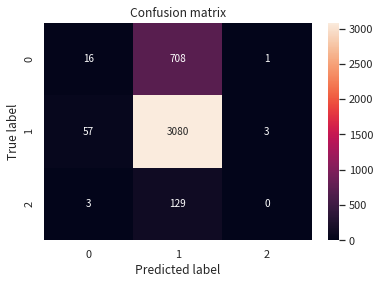

1    0.788181
0    0.176892
2    0.034928
Name: health, dtype: float64
1    0.979985
0    0.019014
2    0.001001
dtype: float64


In [26]:
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score
from xgboost import XGBClassifier

#モデルのパラメータを設定する
params = {
    'max_depth': 3,
    'learning_rate': 1,
    'objective': 'multi:softprob', 
    'num_class': 3}

#モデルのインスタンス作成
model=xgb.XGBClassifier(**params)

#モデルを学習する
model.fit(X_train, y_train)

# USBaggingClassifier
#usbc = BalancedBaggingClassifier(base_estimator=model, n_jobs=-1, n_estimators=10, sampling_strategy='not minority')
#usbc.fit(X_train, y_train)

#予測する
tr_pred = model.predict(X_valid)
y_pred_prob = model.predict_proba(X_valid)
print(tr_pred)
print(y_pred_prob)

#予測結果を0,1,2のクラスラベルに変換する
tr_pred = np.round(tr_pred).astype(int)
print(tr_pred)

#予測精度を計算する
val_f1 = f1_score(y_valid, tr_pred, average='macro')
print(f"Validation F1 Score (Macro): {val_f1}")

#バランス精度を計算する
balanced_accuracy=balanced_accuracy_score(y_valid, tr_pred)
print(f"Validation balanced_accuracy: {balanced_accuracy}")

#recallを計算する
recall=recall_score(y_valid, tr_pred, average=None)
print(f"Validation recall: {recall}")

#混合行列を表示する
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_valid, tr_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

#df_trainのhealthの0,1,2の割合を確認
print(df_train['health'].value_counts(normalize=True))

#df_trainの予測したhealthの0,1,2の割合を確認
print(pd.Series(tr_pred).value_counts(normalize=True))


In [ ]:
# Check the shape of the test data
print(df_test.shape)

# Add missing features to the test data
missing_features = set(X_train.columns) - set(df_test.columns)
for feature in missing_features:
    df_test[feature] = 0

# Reorder the columns to match the training data
df_test = df_test[X_train.columns]

# Predict using the fixed test data
pred = model.predict(df_test)

# Convert the predictions to class labels
pred = np.round(pred).astype(int)

# Create the submission file
df_sample_submission[1] = pred
df_sample_submission.to_csv('submit.csv', header=None, index=False)
print(df_sample_submission.head())

#df_testの予測したhealthの0,1,2の割合を確認
print(pd.Series(pred).value_counts(normalize=True))

(19702, 1131)
       0  1
0  19984  2
1  19985  1
2  19986  1
3  19987  1
4  19988  1
1    0.586793
2    0.411532
0    0.001675
dtype: float64


In [9]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, classification_report

# Create an instance of the XGBoost classifier
model = XGBClassifier()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = model.predict(X_valid)

# Calculate the F1 score and classification report
f1 = f1_score(y_valid, y_pred, average='macro')
report = classification_report(y_valid, y_pred)

# Print the F1 score and classification report
print(f"F1 Score: {f1}")
print("Classification Report:")
print(report)


F1 Score: 0.3003434411954888
Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.01      0.02       725
           1       0.79      0.99      0.88      3140
           2       0.00      0.00      0.00       132

    accuracy                           0.78      3997
   macro avg       0.36      0.33      0.30      3997
weighted avg       0.67      0.78      0.69      3997

